<a id="index"></a>
# Index

Initialize:
- [Define company ticker](#ticker)
- [Import python modules](#imports)
- [Remove previous files](#remove_previous_files)

Import Data:
- [Import data from Financial Modeling Prep](#fmp_import)
- [Filter dataframe for selected period and sort descending](#filter_df2)
- [Get company currency](#get_company_currency)
- [Download the company image](#download_company_image)

Process Data
- [Create  graphs:](#graph_df)
    - [[Graph] Balance Sheet: Nominal and Common size](#bs_graph)
    - [[Graph] Income Statement: Nominal and Common size](#is_graph)
    - [[Graph] Cash Flow Statement](#CF_graph)
    - [[DataFrame] Equity Uses](#equity_uses_table)
    - [[Graph] Equity Uses](#equity_uses)

- [Create financial statements:](#statements)
    - [[Table] Income statement](#table_is)
    - [[Table] Common size income statement](#table_cs_is)
    - [[Table] Balance Sheet](#table_bs)
    - [[Table] Common Size Balance Sheet ](#table_cs_bs)
    - [[Table] Cash Flow Statement ](#table_cf)
    
 - [Create Key Metrics tables](#metrics)
    - [[Table] Market Ratios ](#table_market)
    - [[Table] Debt, Liquidity and Solvency Ratios ](#table_debt)
    - [[Table] Profit Ratios ](#table_profit)
    - [[Table] Efficiency Ratios ](#table_efficiency)
    - [[Table] Key Metrics ](#table_metrics)

Outputs
- [Exporting as a PDF file](#export_pdf)
    - [PDF Variables](#variables_pdf)
    - [Defining Classes ](#defining_classes_pdf)
    - [Instantiation of Class  ](#class_instantiation_pdf)
    - [Page 1: Company Description ](#page1_pdf)
    - [Page 2: Financial Statements ](#page2_pdf)
    - [Page 3: Internal Company Metrics ](#page3_pdf)
    - [Page 4: Market Ratios ](#page4_pdf)
    - [Page 5: Financial Statement Graphs ](#page5_pdf)
    - [Page 6: Common Size Financial Statement Graphs](#page6_pdf)
    - [Save output as PDF ](#save_output_pdf)

# Initialize

<a id="ticker"></a>
### Define company ticker [*](#index)

In [1]:
# Define company ticker
company = "GOOGL"
print("\nCompany report for: "+company)

# Define years to analyse company
years = 5
print("Years Analysed: "+str(years))


Company report for: GOOGL
Years Analysed: 5


<a id="imports"></a>
### Import python modules [*](#index)

In [2]:
# Import python modules
import os
import shutil
import requests
import pandas as pd
import datetime as dt
from fpdf import FPDF
from PIL import Image
import dataframe_image as dfi
import plotly.graph_objects as go

print("Python modules imported.\n")

# Display full pandas dataframe
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("Displaying Max Rows in Pandas.\n")

Python modules imported.

Displaying Max Rows in Pandas.



<a id="remove_previous_files"></a>
### Remove previous files [*](#index)


In [3]:
# Remove previous files
# To make sure report does not contain images from another company
shutil.rmtree('images/output')
os.makedirs('images/output')
print("\n All Previous files removed.\n")


 All Previous files removed.



# Import Data:

<a id="fmp_import"></a>
### Importing data from Financial Modeling Prep [*](#index)

In [4]:
# Importing data from Financial Modeling Prep

# Financial Modeling Prep API Key
api = os.environ.get("token_finmodelprep2")

www = 'https://financialmodelingprep.com/api/v3'
www4 = 'https://financialmodelingprep.com/api/v4'
is_www = '/income-statement/'
bs_www = '/balance-sheet-statement/'
cf_www = '/cash-flow-statement/'
r_www = '/ratios/'
km_www = '/key-metrics/'
p_www = '/profile/'
rtg_www = '/rating/'
es_www = '/earnings-surprises/'
# sp_www = "/stock_peers"

# Data to Import
IS = requests.get(f'{www}{is_www}{company}?apikey={api}').json()
BS = requests.get(f'{www}{bs_www}{company}?apikey={api}').json()
CF = requests.get(f'{www}{cf_www}{company}?apikey={api}').json()
Ratios = requests.get(f'{www}{r_www}{company}?apikey={api}').json()
Metrics = requests.get(f'{www}{km_www}{company}?apikey={api}').json()
Profile = requests.get(f'{www}{p_www}{company}?apikey={api}').json()
Raiting = requests.get(f'{www}{rtg_www}{company}?apikey={api}').json()
Surprises = requests.get(f'{www}{es_www}{company}?apikey={api}').json()
# Peers = requests.get(f'{www4}{sp_www}?symbol={company}&apikey={api}').json()
# Stock peers is an endpoint for a paid plan so its commented out. 

<a id="fmp_to_df"></a>
### Transforming the downloaded data to a dataframe[*](#index)

In [5]:
# Exploring the downloaded information:
is_df = pd.DataFrame(IS)
bs_df = pd.DataFrame(BS)
cf_df = pd.DataFrame(CF)
ratios_df = pd.DataFrame(Ratios)
metrics_df = pd.DataFrame(Metrics)
profile_df = pd.DataFrame(Profile)
raiting_df = pd.DataFrame(Raiting)
surprises_df = pd.DataFrame(Surprises)
# stock_peers_df = pd.DataFrame(Peers)

print("Done importing FMP to pandas.\n")

# Uncomment to explore dataframe:
# is_df.head(10)
# bs_df.head()
# cf_df.head()
# ratios_df.head(10)
# metrics_df.head()
# profile_df.head()
# raiting_df.head()
# surprises_df.head()
# symbol_df.head()
# stock_peers_df.head()

Done importing FMP to pandas.



<a id="filter_df2"></a>
### Filter dataframe for selected period and sort descending[*](#index)

In [6]:
# Sort the data years in descending order (2020 -> 2021 -> 2022)
bs_df.sort_index(ascending=False, inplace=True)
is_df.sort_index(ascending=False, inplace=True)
cf_df.sort_index(ascending=False, inplace=True)

print("Done sorting the dates in descending order.\n")

Done sorting the dates in descending order.



In [7]:
# Filter databases for the selected number of years
# Useful for paid plan
bs_df = bs_df.iloc[-years:]
is_df = is_df.iloc[-years:]
cf_df = cf_df.iloc[-years:]

print("Done filtering dataframes for", years, "years.\n")

Done filtering dataframes for 5 years.



<a id="get_company_currency"></a>
### Get company currency[*](#index)

In [8]:
# Get company Currency
currency = bs_df.iloc[0]["reportedCurrency"]
print("The currency for company "+company+" is: "+currency)

The currency for company GOOGL is: USD


<a id="download_company_image"></a>
### Download company image[*](#index)

In [9]:
# Download the company image
try:
    imageurl = profile_df.iloc[0]['image']
    r = requests.get(imageurl)
    with open("images/output/company_logo.png", "wb") as f:
        f.write(r.content)
    print("Company Logo downloaded\n")
except Exception:
    print("Could not download company logo")
    pass

Company Logo downloaded



# Process Data

<a id="graph_df"></a>
### Create graphs [*](#index)

<a id="bs_graph"></a>
### [Graph] Balance Sheet: Nominal and Common size [*](#index)

Balance sheet graph created.



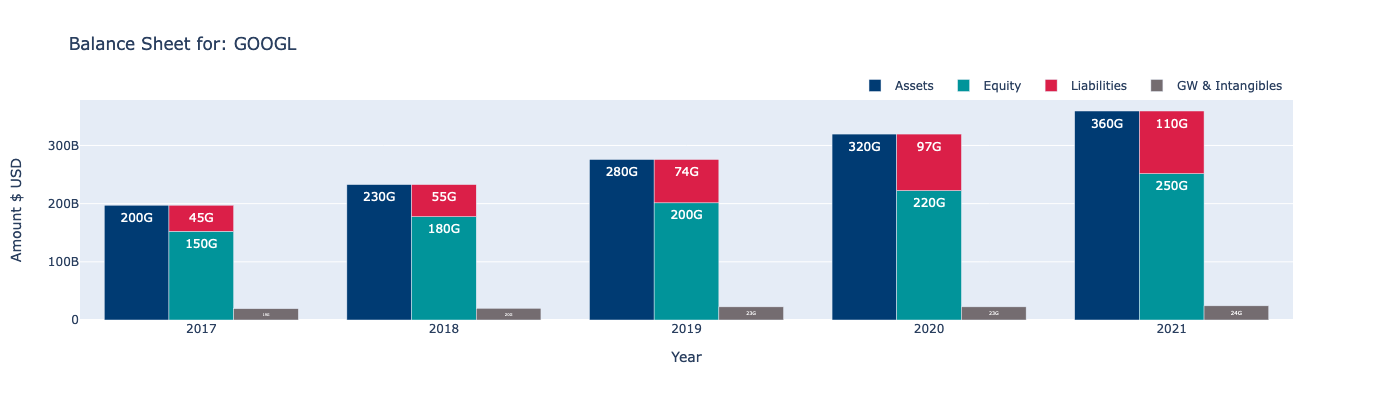

Common size balance sheet graph created.



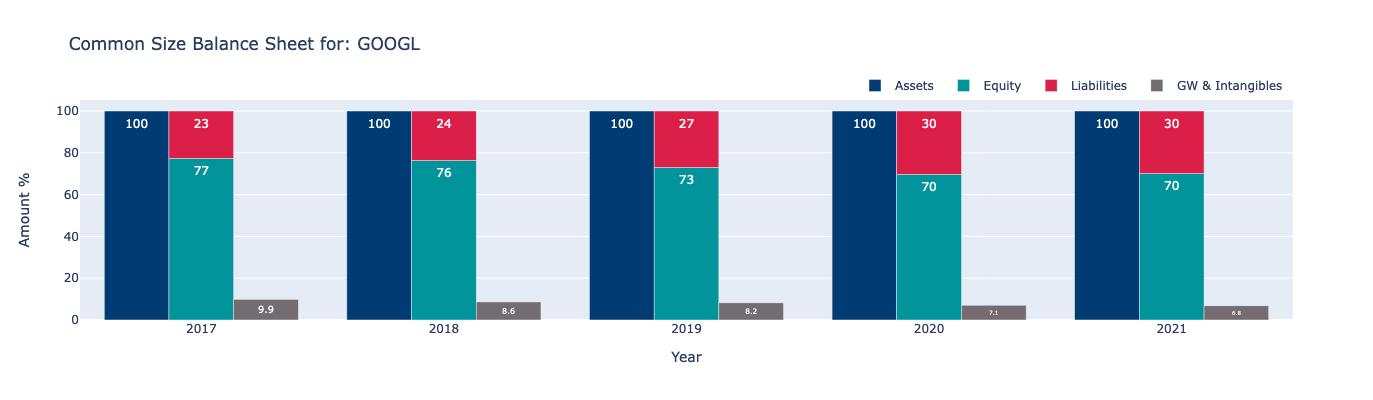

In [10]:
# Balance Sheet Graph
fig = go.Figure(
    data=[
        go.Bar(name="Assets",
               x=bs_df["calendarYear"],
               y=bs_df["totalAssets"],
               marker_color="#003B73",
               offsetgroup=0,
               ),
        go.Bar(name="Equity",
               x=bs_df["calendarYear"],
               y=bs_df["totalStockholdersEquity"],
               marker_color="#01949a",
               offsetgroup=1,
               ),
        go.Bar(name="Liabilities",
               x=bs_df["calendarYear"],
               y=bs_df["totalLiabilities"],
               marker_color="#db1f48",
               offsetgroup=1,
               base=bs_df["totalStockholdersEquity"],
               ),
        go.Bar(name="GW & Intangibles",
               x=bs_df["calendarYear"],
               y=bs_df["goodwillAndIntangibleAssets"],
               marker_color="#746C70",
               offsetgroup=2,
               ),
         ])
fig.update_layout(barmode="group",
                  title=str("Balance Sheet for: " + company),
                  xaxis_title="Year",
                  yaxis_title=("Amount $ " + currency),
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              xanchor="right",
                              x=1, y=1.0),
                  width=800, height=400)

fig.update_traces(texttemplate="%{y:.2s}", textposition="inside")
file_name = "images/output/bs_graph.png"
fig.write_image(file_name, format='png', scale=2)

print("Balance sheet graph created.\n")
fig.show()

# Common Size Balance Sheet Graph
fig = go.Figure(
    data=[
        go.Bar(name="Assets",
               x=bs_df["calendarYear"],
               y=bs_df["totalAssets"]/bs_df["totalAssets"]*100,
               marker_color="#003B73",
               offsetgroup=0,
               ),
        go.Bar(name="Equity",
               x=bs_df["calendarYear"],
               y=bs_df["totalStockholdersEquity"]/bs_df["totalAssets"]*100,
               marker_color="#01949a",
               offsetgroup=1,
               ),
        go.Bar(name="Liabilities",
               x=bs_df["calendarYear"],
               y=bs_df["totalLiabilities"]/bs_df["totalAssets"]*100,
               marker_color="#db1f48",
               offsetgroup=1,
               base=bs_df["totalStockholdersEquity"]/bs_df["totalAssets"]*100,
               ),
        go.Bar(name="GW & Intangibles",
               x=bs_df["calendarYear"],
               y=bs_df["goodwillAndIntangibleAssets"]/bs_df["totalAssets"]*100,
               marker_color="#746C70",
               offsetgroup=2,
               ),
         ])
fig.update_layout(barmode="group",
                  title=str("Common Size Balance Sheet for: " + company),
                  xaxis_title="Year",
                  yaxis_title=("Amount % "),
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              xanchor="right",
                              x=1, y=1.0),
                  width=800, height=400)

fig.update_traces(texttemplate="%{y:.2s}", textposition="inside")
file_name = "images/output/bs_graph_cs.png"
fig.write_image(file_name, format='png', scale=2)

print("Common size balance sheet graph created.\n")
fig.show()

<a id="is_graph"></a>
### [Graph] Income Statement: Nominal and Common size [*](#index)

Income statement graph created.



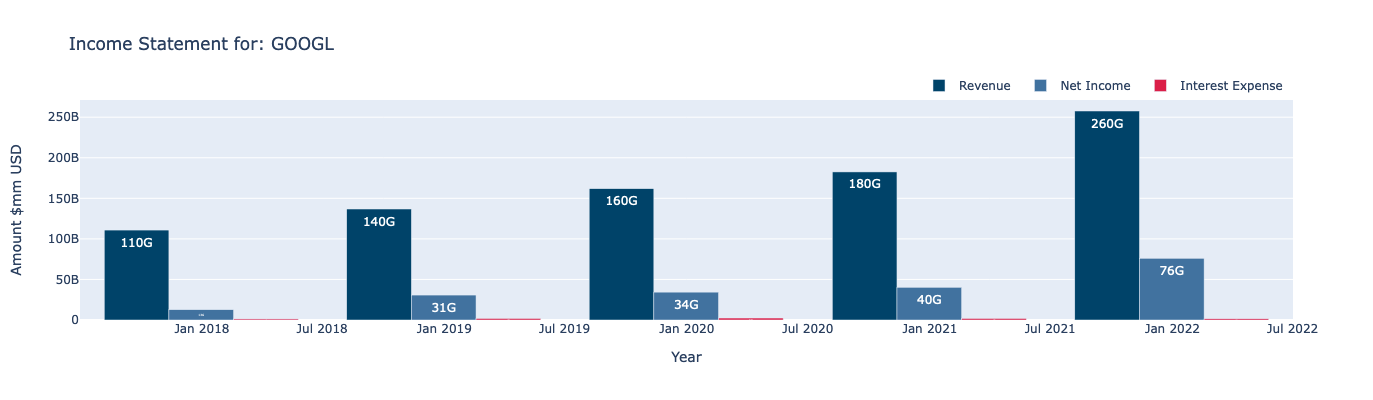

Common size income statement graph created.



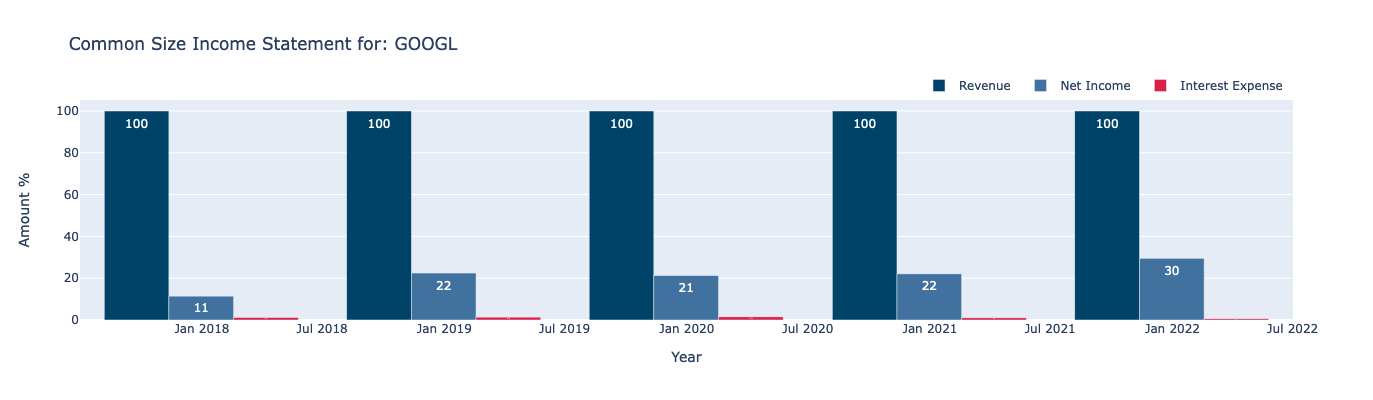

In [11]:
# Income Statement Graph

# Graph the Income Statement
fig = go.Figure(
    data=[
        go.Bar(name='Revenue',
               x=is_df["date"],
               y=is_df['revenue'],
               marker_color='#004369'
               ),
        go.Bar(name='Net Income',
               x=is_df["date"],
               y=is_df['netIncome'],
               marker_color='#41729f'
               ),
        go.Bar(name='Interest Expense',
               x=is_df["date"],
               y=is_df['interestIncome'],
               marker_color='#DB1F48'
               )
          ])
fig.update_layout(barmode='group',
                  title=str('Income Statement for: '+company),
                  xaxis_title='Year',
                  yaxis_title=('Amount $mm '+currency),
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              y=1.0,
                              xanchor="right",
                              x=1),
                  width=800, height=400)

fig.update_traces(texttemplate="%{y:.2s}", textposition="inside")
file_name = "images/output/is_graph.png"
fig.write_image(file_name, scale=2)

print("Income statement graph created.\n")
fig.show()

# Common Size Income Statement Graph
fig = go.Figure(
    data=[
        go.Bar(name='Revenue',
               x=is_df["date"],
               y=is_df['revenue']/is_df['revenue']*100,
               marker_color='#004369'
               ),
        go.Bar(name='Net Income',
               x=is_df["date"],
               y=is_df['netIncome']/is_df['revenue']*100,
               marker_color='#41729f'
               ),
        go.Bar(name='Interest Expense',
               x=is_df["date"],
               y=is_df['interestIncome']/is_df['revenue']*100,
               marker_color='#DB1F48'
               )
          ])
fig.update_layout(barmode='group',
                  title=str('Common Size Income Statement for: '+company),
                  xaxis_title='Year',
                  yaxis_title=('Amount % '),
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              y=1.0,
                              xanchor="right",
                              x=1),
                  width=800, height=400)

fig.update_traces(texttemplate="%{y:.2s}", textposition="inside")
file_name = "images/output/is_graph_cs.png"
fig.write_image(file_name, scale=2)

print("Common size income statement graph created.\n")
fig.show()

<a id="CF_graph"></a>
### [Graph] Cash Flow Statement [*](#index)

Cash flow statement graph created.



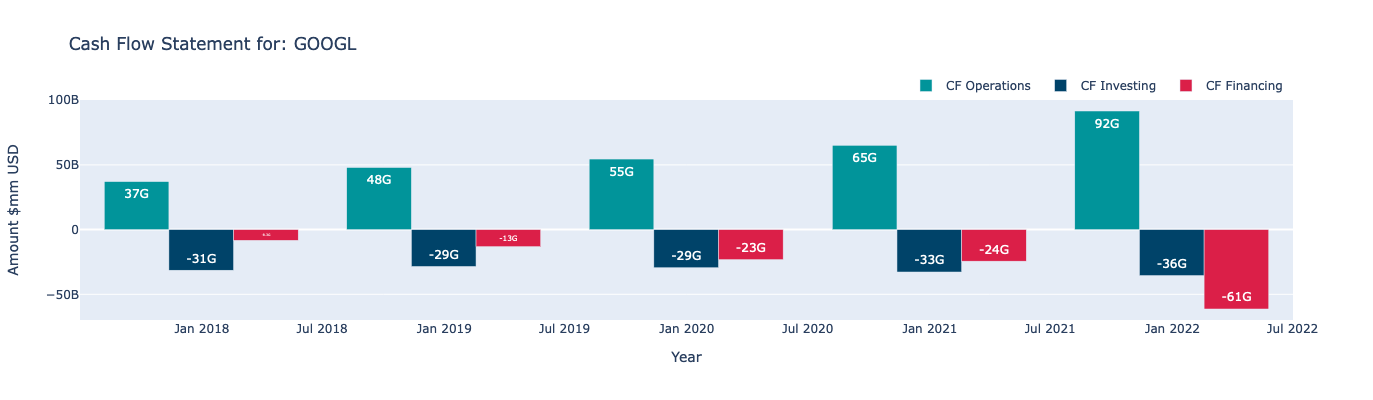

In [12]:
# Cash Flow Statement Graph

# Graph the Cash Flow Statement
fig = go.Figure(
    data=[
        go.Bar(name='CF Operations',
               x=cf_df["date"],
               y=cf_df['netCashProvidedByOperatingActivities'],
               marker_color='#01949A',
               offsetgroup=2
               ),
        go.Bar(name='CF Investing',
               x=cf_df["date"],
               y=cf_df['netCashUsedForInvestingActivites'],
               marker_color='#004369',
               offsetgroup=3,
               ),
        go.Bar(name='CF Financing',
               x=cf_df["date"],
               y=cf_df['netCashUsedProvidedByFinancingActivities'],
               marker_color='#DB1F48',
               offsetgroup=4,
               )
          ])
fig.update_layout(barmode='group',
                  title=str('Cash Flow Statement for: '+company),
                  xaxis_title='Year',
                  yaxis_title=('Amount $mm '+currency),
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              y=1.0,
                              xanchor="right",
                              x=1),
                  width=800, height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')
file_name = "images/output/cf_graph.png"
fig.write_image(file_name, scale=2)

print("Cash flow statement graph created.\n")
fig.show()

<a id="equity_uses_table"></a>
### [DataFrame] Equity Uses [*](#index)

In [13]:
# Equity uses Graph needs data from three dataframes:
# Create a new dataframe with the information needed

# Copy original df into a new df
bs_equity = bs_df.copy(deep=True)
cf_equity = cf_df.copy(deep=True)
is_equity = is_df.copy(deep=True)

# Add Last Year Equity column to BS
bs_equity['LY_totalStockholdersEquity'] = (
    bs_equity['totalStockholdersEquity'].shift(-1)
)

# Make the date the index value
bs_equity.set_index('date', inplace=True)
cf_equity.set_index('date', inplace=True)
is_equity.set_index('date', inplace=True)

# Drop duplicate column netIncome
cf_equity.drop('netIncome', axis=1, inplace=True)

# Merge dataframes
equityUses_df = pd.concat([bs_equity, cf_equity, is_equity], axis=1)

# Reset index to make 'date' a column instead of index value
equityUses_df = equityUses_df.reset_index()

# Make sure all variables are float64
equityUses_df['LY_totalStockholdersEquity'] = (
    equityUses_df['LY_totalStockholdersEquity'].astype(float)
)
equityUses_df['netIncome'] = equityUses_df['netIncome'].astype(float)
equityUses_df['dividendsPaid'] = equityUses_df['dividendsPaid'].astype(float)

print("Dataframe 'equityUses_df' created.\n")

Dataframe 'equityUses_df' created.



<a id="equity_uses"></a>
### [Graph] Equity Uses [*](#index)

Equity Uses graph created.



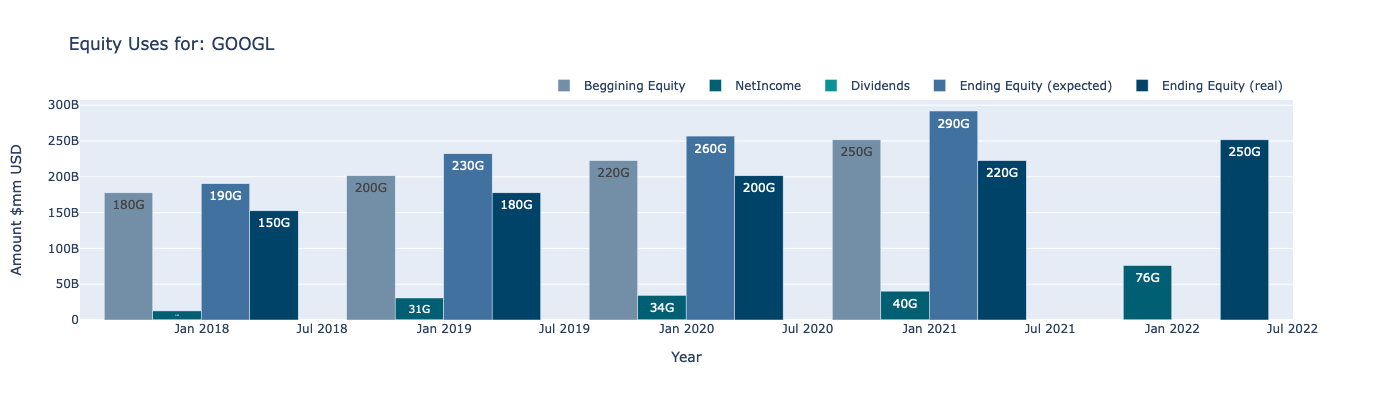

In [14]:
# Equity Uses graph
fig = go.Figure(
    data=[
        go.Bar(name='Beggining Equity',
               x=equityUses_df["date"],
               y=equityUses_df['LY_totalStockholdersEquity'],
               marker_color='#738fa7',
               offsetgroup=0
               ),
        go.Bar(name='NetIncome',
               x=equityUses_df["date"],
               y=equityUses_df['netIncome'],
               marker_color='#005f73',
               offsetgroup=1,
               ),
        go.Bar(name='Dividends',
               x=equityUses_df["date"],
               y=equityUses_df['dividendsPaid'],
               marker_color='#0a9396',
               offsetgroup=1,
               ),
        go.Bar(name='Ending Equity (expected)',
               x=equityUses_df["date"],
               y=(equityUses_df['LY_totalStockholdersEquity']
                  + equityUses_df['netIncome']
                  + equityUses_df['dividendsPaid']),
               marker_color='#41729f',
               offsetgroup=2
               ),
        go.Bar(name='Ending Equity (real)',
               x=equityUses_df["date"],
               y=equityUses_df['totalStockholdersEquity'],
               marker_color='#004369',
               offsetgroup=3
               )
           ])
fig.update_layout(barmode='group',
                  title=str('Equity Uses for: '+company),
                  xaxis_title='Year',
                  yaxis_title=('Amount $mm '+currency),
                  legend=dict(orientation="h",
                              yanchor="bottom",
                              y=1.0,
                              xanchor="right",
                              x=1),
                  width=800,
                  height=400)

fig.update_traces(texttemplate='%{y:.2s}', textposition='inside')
fig.write_image("images/output/equity_graph.png", scale=2)

print("Equity Uses graph created.\n")
fig.show()

<a id="statements"></a>
### Create financial statements [*](#index)

<a id="table_is"></a>
### [Table] Income Statement [*](#index)

In [15]:
# Income Statement Table

# Copy Income Statement dataframe
is_table = is_df.copy(deep=True)

# Make the year the index value
is_table.set_index('calendarYear', inplace=True)
is_table.index.rename('Year', inplace=True)

# Drop non used variables
is_table.drop(
    ['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate',
     'acceptedDate', 'period', 'grossProfitRatio',
     'sellingAndMarketingExpenses', 'generalAndAdministrativeExpenses',
     'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
     'operatingIncomeRatio', 'costAndExpenses', 'interestIncome',
     'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
     'totalOtherIncomeExpensesNet', 'incomeBeforeTax', 'incomeBeforeTaxRatio',
     'incomeTaxExpense', 'netIncomeRatio', 'eps', 'epsdiluted',
     'weightedAverageShsOut', 'weightedAverageShsOutDil', 'link', 'finalLink'
     ], axis=1, inplace=True)

# Reorder Columns
is_table = is_table[['revenue', 'costOfRevenue', 'grossProfit',
                     'operatingExpenses', 'operatingIncome', 'netIncome']]

# Rename columns as they will appear in image
is_table.rename(columns={
    'revenue': 'Revenue',
    'costOfRevenue': 'Cost Of Revenue',
    'grossProfit': 'Gross Profit',
    'operatingExpenses': 'Operating Expenses',
    'operatingIncome': 'Operating Income',
    'netIncome': 'Net Income',
    }, inplace=True)

# Copy dataframe to create Common Size Income Statement
cs_is_table = is_table.copy(deep=True)

# Format columns to create the image from the dataframe
is_columns = ['Revenue', 'Cost Of Revenue', 'Gross Profit',
              'Operating Expenses', 'Operating Income', 'Net Income']

# Divide values by one million
for column_name in is_columns:
    is_table[column_name] = is_table[column_name].div(1_000_000)

# Format columns: Turn to string, include commas and remove decimals
for column_name in is_columns:
    is_table[column_name] = (
        pd.Series([f"{val:,.0f}"for val in is_table[column_name]],
                  index=is_table.index))
# Transpose data
is_table = is_table.transpose()

# Save dataframe as image:
is_table.dfi.export('images/output/is_table.png')

# Print table name
print("Created income statement table.\n")

# Show table
is_table

objc[20278]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x11639fe08). One of the two will be used. Which one is undefined.
[0914/193202.836165:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmpm7kxec67/temp.png.


Created income statement table.



Year,2017,2018,2019,2020,2021
Revenue,"110,855","136,819","161,857","182,527","257,637"
Cost Of Revenue,"45,583","59,549","71,896","84,732","110,939"
Gross Profit,"65,272","77,270","89,961","97,795","146,698"
Operating Expenses,"36,390","45,878","54,033","56,571","67,984"
Operating Income,"26,146","26,321","34,231","41,224","78,714"
Net Income,"12,662","30,736","34,343","40,269","76,033"


<a id="table_cs_is"></a>
### [Table] Common Size Income Statement [*](#index)

In [16]:
# Common Size Income Statement Table

# Transform values to Common Size (Percentage of Revenue)
# Revenue must be the last item on the list
cs_is_columns = ['Cost Of Revenue', 'Gross Profit', 'Operating Expenses',
                 'Operating Income', 'Net Income', 'Revenue']

# Divide values by Revenue
for column in cs_is_columns:
    cs_is_table[column] = (
        round(((cs_is_table[column]/cs_is_table['Revenue'])*100), 0))

# Format columns: Turn to string and format as percentage %
for column in cs_is_columns:
    cs_is_table[column] = (
        pd.Series(["{0:.0f}%".format(val) for val in cs_is_table[column]],
                  index=cs_is_table.index))
# Transpose data
cs_is_table = cs_is_table.transpose()

# Save dataframe as image:
cs_is_table.dfi.export('images/output/is_table_cs.png')

# Print table name
print("Created common size income statement table.\n")

# Show table
cs_is_table

objc[20304]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x111381e08). One of the two will be used. Which one is undefined.
[0914/193204.452167:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmpmxyaf2__/temp.png.


Created common size income statement table.



Year,2017,2018,2019,2020,2021
Revenue,100%,100%,100%,100%,100%
Cost Of Revenue,41%,44%,44%,46%,43%
Gross Profit,59%,56%,56%,54%,57%
Operating Expenses,33%,34%,33%,31%,26%
Operating Income,24%,19%,21%,23%,31%
Net Income,11%,22%,21%,22%,30%


<a id="table_bs"></a>
### [Table] Balance Sheet [*](#index)

In [17]:
# Balance Sheet Table

# Copy income statement dataframe
bs_table = bs_df.copy(deep=True)

# Make the year the index value
bs_table.set_index('calendarYear', inplace=True)
bs_table.index.rename('Year', inplace=True)

# Drop non used variables
bs_table.drop(
    ['date', 'symbol', 'reportedCurrency', 'cik', 'fillingDate',
     'acceptedDate', 'period', 'cashAndCashEquivalents',
     'shortTermInvestments', 'cashAndShortTermInvestments',
     'netReceivables', 'inventory', 'otherCurrentAssets',
     'propertyPlantEquipmentNet', 'goodwill', 'intangibleAssets',
     'goodwillAndIntangibleAssets', 'longTermInvestments', 'taxAssets',
     'otherNonCurrentAssets', 'otherAssets', 'accountPayables',
     'shortTermDebt', 'taxPayables', 'deferredRevenue',
     'otherCurrentLiabilities', 'longTermDebt', 'deferredRevenueNonCurrent',
     'deferredTaxLiabilitiesNonCurrent', 'otherNonCurrentLiabilities',
     'otherLiabilities', 'capitalLeaseObligations', 'preferredStock',
     'commonStock', 'retainedEarnings',
     'accumulatedOtherComprehensiveIncomeLoss', 'othertotalStockholdersEquity',
     'totalLiabilitiesAndStockholdersEquity', 'minorityInterest',
     'totalEquity', 'totalLiabilitiesAndTotalEquity',
     'totalInvestments', 'totalDebt', 'netDebt', 'link', 'finalLink'
     ], axis=1, inplace=True)

# Rename columns as they will appear in image
bs_table.rename(columns={
    'totalCurrentAssets': 'Cur Assets',
    'totalNonCurrentAssets': 'LT Asset',
    'totalAssets': 'Total Assets',
    'totalCurrentLiabilities': 'Cur Liabilities',
    'totalNonCurrentLiabilities': 'LT Liabilities',
    'totalLiabilities': 'Total Liab',
    'totalStockholdersEquity': 'SH Equity',
    }, inplace=True)

# Copy dataframe to create common size income statement
cs_bs_table = bs_table.copy(deep=True)

# Format columns to create the image from the dataframe
bs_columns = ['Cur Assets', 'LT Asset', 'Total Assets',
              'Cur Liabilities', 'LT Liabilities', 'Total Liab',
              'SH Equity']

# Divide values by one million
for column_name in bs_columns:
    bs_table[column_name] = bs_table[column_name].div(1_000_000)

# Format columns: Turn to string, include commas and remove decimals
for column_name in bs_columns:
    bs_table[column_name] = (
        pd.Series([f"{val:,.0f}"for val in bs_table[column_name]],
                  index=bs_table.index))

# Transpose data
bs_table = bs_table.transpose()

# Save dataframe as image:
bs_table.dfi.export('images/output/bs_table.png')

# Print table name
print("Created balance sheet table.\n")

# Show table
bs_table

objc[20315]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x114f05e08). One of the two will be used. Which one is undefined.
[0914/193205.655071:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmpjm5_al30/temp.png.


Created balance sheet table.



Year,2017,2018,2019,2020,2021
Cur Assets,"124,308","135,676","152,578","174,296","188,143"
LT Asset,"72,987","97,116","123,331","145,320","171,124"
Total Assets,"197,295","232,792","275,909","319,616","359,268"
Cur Liabilities,"24,183","34,620","45,221","56,834","64,254"
LT Liabilities,"20,610","20,544","29,246","40,238","43,379"
Total Liab,"44,793","55,164","74,467","97,072","107,633"
SH Equity,"152,502","177,628","201,442","222,544","251,635"


<a id="table_cs_bs"></a>
### [Table] Common Size Balance Sheet [*](#index)

In [18]:
# Common Size Balance Sheet Table

# Transform values to Common Size (Percentage of Assets)
# Assets must be the last item on the list
cs_bs_columns = ['Cur Assets', 'LT Asset', 'Cur Liabilities',
                 'LT Liabilities', 'Total Liab', 'SH Equity',
                 'Total Assets']

# Divide values by Total Assets value
for column in cs_bs_columns:
    cs_bs_table[column] = (
        round(((cs_bs_table[column]/cs_bs_table['Total Assets'])*100), 0))

# Format columns: Turn to string and format as percentage %
for column in cs_bs_columns:
    cs_bs_table[column] = (
        pd.Series(["{0:.0f}%".format(val) for val in cs_bs_table[column]],
                  index=cs_bs_table.index))
# Transpose data
cs_bs_table = cs_bs_table.transpose()

# Save dataframe as image:
cs_bs_table.dfi.export('images/output/bs_table_cs.png')

# Print table name
print("Created common size balance sheet table.\n")

# Show table
cs_bs_table

objc[20325]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x117b70e08). One of the two will be used. Which one is undefined.
[0914/193206.753709:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmpe8pm_h_o/temp.png.


Created common size balance sheet table.



Year,2017,2018,2019,2020,2021
Cur Assets,63%,58%,55%,55%,52%
LT Asset,37%,42%,45%,45%,48%
Total Assets,100%,100%,100%,100%,100%
Cur Liabilities,12%,15%,16%,18%,18%
LT Liabilities,10%,9%,11%,13%,12%
Total Liab,23%,24%,27%,30%,30%
SH Equity,77%,76%,73%,70%,70%


<a id="table_cf"></a>
### [Table] Cash Flow Statement [*](#index)

In [19]:
# Cash Flow Statment Table

# Copy income statement dataframe
cf_table = cf_df.copy(deep=True)

# Make the year the index value
cf_table.set_index('calendarYear', inplace=True)
cf_table.index.rename('Year', inplace=True)

# Drop non used variables
cf_table.drop(
    ['date', 'symbol', 'reportedCurrency', 'cik',
     'fillingDate', 'acceptedDate',
     'period', 'netIncome', 'depreciationAndAmortization',
     'deferredIncomeTax', 'stockBasedCompensation',
     'changeInWorkingCapital', 'accountsReceivables',
     'inventory', 'accountsPayables', 'otherWorkingCapital',
     'otherNonCashItems', 'investmentsInPropertyPlantAndEquipment',
     'acquisitionsNet', 'purchasesOfInvestments',
     'salesMaturitiesOfInvestments', 'otherInvestingActivites',
     'debtRepayment', 'commonStockIssued',
     'commonStockRepurchased', 'dividendsPaid',
     'otherFinancingActivites', 'effectOfForexChangesOnCash',
     'operatingCashFlow', 'capitalExpenditure',
     'freeCashFlow', 'link', 'finalLink'
     ], axis=1, inplace=True)

# Rename columns as they will appear in image
cf_table.rename(columns={
    'netCashProvidedByOperatingActivities': 'CF Operating Activities',
    'netCashUsedForInvestingActivites': 'CF Investing Activities',
    'netCashUsedProvidedByFinancingActivities': 'CF Financing Activities',
    'netChangeInCash': 'Change in cash',
    'cashAtEndOfPeriod': 'Cash end of period',
    'cashAtBeginningOfPeriod': 'Cash beggining of period',
    }, inplace=True)

# Format columns to create the image from the dataframe
cf_columns = ['CF Operating Activities', 'CF Investing Activities',
              'CF Financing Activities', 'Change in cash',
              'Cash end of period', 'Cash beggining of period']

# Divide values by one million
for column_name in cf_columns:
    cf_table[column_name] = cf_table[column_name].div(1_000_000)

# Format columns: Turn to string, include commas and remove decimals
for column_name in cf_columns:
    cf_table[column_name] = (
        pd.Series([f"{val:,.0f}"for val in cf_table[column_name]],
                  index=cf_table.index))

# Transpose data
cf_table = cf_table.transpose()

# Save dataframe as image:
cf_table.dfi.export('images/output/cf_table.png')

# Print table name
print("Created cash flow statement table.\n")

# Show table
cf_table

objc[20335]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x11da07e08). One of the two will be used. Which one is undefined.
[0914/193207.790489:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmpnnid9rx9/temp.png.


Created cash flow statement table.



Year,2017,2018,2019,2020,2021
CF Operating Activities,"37,091","47,971","54,520","65,124","91,652"
CF Investing Activities,"-31,401","-28,504","-29,491","-32,773","-35,523"
CF Financing Activities,"-8,298","-13,179","-23,209","-24,408","-61,362"
Change in cash,"-2,203","5,986","1,797","7,967","-5,520"
Cash end of period,"10,715","16,701","18,498","26,465","20,945"
Cash beggining of period,"12,918","10,715","16,701","18,498","26,465"


<a id="metrics"></a>
### Create Key Metrics tables [*](#index)

<a id="table_market"></a>
### [Table] Market Ratios [*](#index)

In [20]:
# Market Ratios Table

# Copy ratios statement dataframe
mratios_table = ratios_df.copy(deep=True)
mratios_table.sort_index(ascending=False, inplace=True)

# If dividendYield is None replace with 0
mratios_table['dividendYield'].replace([None], 0, inplace=True)

# If dividendYield is String replace as Float
mratios_table['dividendYield'] = mratios_table['dividendYield'].astype(float)

# Add Earnings Yield to table
mratios_table['Earnings Yield'] = (1 / mratios_table['priceEarningsRatio'])

# Transform date column from string to datetime
# Display only the year from the date column
mratios_table['date'] = pd.to_datetime(mratios_table['date'])
mratios_table['date'] = mratios_table['date'].dt.year

# Get defined amount of years
mratios_table = mratios_table.iloc[-years:]

# Make date the index value
mratios_table.set_index('date', inplace=True)
mratios_table.index.rename('Date', inplace=True)

# Drop non used variables
mratios_table.drop(
    ['symbol', 'period', 'currentRatio', 'quickRatio',
     'cashRatio', 'daysOfSalesOutstanding',
     'daysOfInventoryOutstanding', 'operatingCycle',
     'daysOfPayablesOutstanding', 'cashConversionCycle',
     'grossProfitMargin', 'operatingProfitMargin',
     'pretaxProfitMargin', 'netProfitMargin',
     'effectiveTaxRate', 'returnOnAssets',
     'returnOnEquity', 'returnOnCapitalEmployed',
     'netIncomePerEBT', 'ebtPerEbit', 'ebitPerRevenue',
     'debtRatio', 'debtEquityRatio',
     'longTermDebtToCapitalization', 'totalDebtToCapitalization',
     'interestCoverage', 'cashFlowToDebtRatio',
     'companyEquityMultiplier', 'receivablesTurnover',
     'payablesTurnover', 'inventoryTurnover',
     'fixedAssetTurnover', 'assetTurnover',
     'operatingCashFlowPerShare', 'freeCashFlowPerShare',
     'cashPerShare', 'payoutRatio', 'operatingCashFlowSalesRatio',
     'freeCashFlowOperatingCashFlowRatio', 'cashFlowCoverageRatios',
     'shortTermCoverageRatios', 'capitalExpenditureCoverageRatio',
     'dividendPaidAndCapexCoverageRatio', 'dividendPayoutRatio',
     'priceBookValueRatio', 'priceCashFlowRatio',
     'priceEarningsToGrowthRatio', 'priceSalesRatio',
     ], axis=1, inplace=True)

# Rename columns as they will appear in image
mratios_table.rename(columns={
    'priceToBookRatio': 'Price to Book Ratio',
    'priceToSalesRatio': 'Price to Sales Ratio',
    'priceEarningsRatio': 'Price to Earnings Ratio',
    'priceToOperatingCashFlowsRatio': 'Price to Operating Cashflow Ratio',
    'priceToFreeCashFlowsRatio': 'Price to Free Cashflow Ratio',
    'dividendYield': 'Dividend Yield',
    'enterpriseValueMultiple': 'Enterprise Value Multiple',
    'priceFairValue': 'Price to Fair Value',
    }, inplace=True)

# Format columns: Turn to string, include commas, and remove decimals
mratios_columns = ['Price to Book Ratio', 'Price to Sales Ratio',
                   'Price to Earnings Ratio',
                   'Price to Operating Cashflow Ratio',
                   'Price to Free Cashflow Ratio',
                   'Enterprise Value Multiple', 'Price to Fair Value']
for column_name in mratios_columns:
    mratios_table[column_name] = (
        pd.Series([f"{val:,.0f}"for val in mratios_table[column_name]],
                  index=mratios_table.index))

# Format columns: Turn to string and format as percentage %
mratios_columnsP = ['Dividend Yield', 'Earnings Yield']
for column_name in mratios_columnsP:
    mratios_table[column_name] = mratios_table[column_name].multiply(100)
    mratios_table[column_name] = (
        pd.Series(["{0:.1f}%".format(val) for val in mratios_table[column_name]],
                  index=mratios_table.index))

# Reorder Columns
mratios_table = mratios_table[[
    'Price to Book Ratio',
    'Price to Sales Ratio',
    'Price to Earnings Ratio',
    'Price to Operating Cashflow Ratio',
    'Enterprise Value Multiple',
    'Price to Fair Value',
    'Dividend Yield',
    'Earnings Yield']]

# Transpose data
mratios_table = mratios_table.transpose()

# Save dataframe as image:
mratios_table.dfi.export('images/output/market_ratios_table.png')

# Print table name
print("Created Market Ratios Table.\n")

# Show table
mratios_table

objc[20346]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x114ae7e08). One of the two will be used. Which one is undefined.


Created Market Ratios Table.



[0914/193208.874662:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmpxszqi2ll/temp.png.


Date,2017,2018,2019,2020,2021
Price to Book Ratio,5,4,5,6,7
Price to Sales Ratio,7,6,6,7,7
Price to Earnings Ratio,64,25,29,31,23
Price to Operating Cashflow Ratio,22,16,18,19,19
Enterprise Value Multiple,33,17,19,20,17
Price to Fair Value,5,4,5,6,7
Dividend Yield,0.0%,0.0%,0.0%,0.0%,0.0%
Earnings Yield,1.6%,4.0%,3.4%,3.2%,4.3%


<a id="table_debt"></a>
### [Table] Debt, Liquidity and Solvency Ratios [*](#index)

In [21]:
# Debt,Liquity and Solvency Table

# Copy income statement dataframe
debt_table = ratios_df.copy(deep=True)
debt_table.sort_index(ascending=False, inplace=True)

# Transfor date column from string to datetime
# Display only the year from the date column
debt_table['date'] = pd.to_datetime(debt_table['date'])
debt_table['date'] = debt_table['date'].dt.year

# Get defined amount of years
debt_table = debt_table.iloc[-years:]

# Make date the index value
debt_table.set_index('date', inplace=True)
debt_table.index.rename('Date', inplace=True)

# Drop non used variables
debt_table.drop(
    ['priceToBookRatio', 'priceToSalesRatio', 'priceEarningsRatio',
     'priceToOperatingCashFlowsRatio', 'priceToFreeCashFlowsRatio',
     'dividendYield', 'enterpriseValueMultiple',
     'priceFairValue', 'symbol', 'period',
     'daysOfSalesOutstanding', 'daysOfInventoryOutstanding',
     'operatingCycle', 'daysOfPayablesOutstanding',
     'cashConversionCycle', 'grossProfitMargin',
     'operatingProfitMargin', 'pretaxProfitMargin',
     'netProfitMargin', 'effectiveTaxRate',
     'returnOnAssets', 'returnOnEquity',
     'returnOnCapitalEmployed', 'netIncomePerEBT',
     'ebtPerEbit', 'ebitPerRevenue',
     'longTermDebtToCapitalization', 'totalDebtToCapitalization',
     'cashFlowCoverageRatios', 'companyEquityMultiplier',
     'receivablesTurnover', 'payablesTurnover',
     'inventoryTurnover', 'fixedAssetTurnover',
     'assetTurnover', 'operatingCashFlowPerShare',
     'freeCashFlowPerShare', 'cashPerShare',
     'payoutRatio', 'operatingCashFlowSalesRatio',
     'freeCashFlowOperatingCashFlowRatio',
     'shortTermCoverageRatios', 'capitalExpenditureCoverageRatio',
     'dividendPaidAndCapexCoverageRatio',
     'dividendPayoutRatio', 'priceBookValueRatio',
     'priceCashFlowRatio', 'priceEarningsToGrowthRatio',
     'priceSalesRatio'], axis=1, inplace=True)

# Rename columns as they will appear in image
debt_table.rename(columns={
    # Debt ratios
    'debtRatio': 'Debt Assets Ratio',
    'debtEquityRatio': 'Debt Equity Ratio',
    # Liquidity ratios
    'currentRatio': 'Current Ratio',
    'quickRatio': 'Quick Ratio',
    'cashRatio': 'Cash Ratio',
    # Solvency ratios
    'interestCoverage': 'Interest Coverage',
    'cashFlowToDebtRatio': 'Opp Cashflow to Debt',
    # Falta debt service ratio
    }, inplace=True)

# Format columns: Turn to string, Include commas and remove decimals
debt_ratios_columns = ['Debt Assets Ratio', 'Debt Equity Ratio',
                       'Current Ratio', 'Quick Ratio', 'Cash Ratio',
                       'Interest Coverage', 'Opp Cashflow to Debt']
for column_name in debt_ratios_columns:
    debt_table[column_name] = pd.Series(
        [f"{val:,.1f}"for val in debt_table[column_name]],
        index=debt_table.index)
# Reorder Columns
debt_table = debt_table[[
    'Debt Assets Ratio',
    'Debt Equity Ratio',
    'Current Ratio',
    'Quick Ratio',
    'Cash Ratio',
    'Opp Cashflow to Debt',
    'Interest Coverage']]

# Transpose data
debt_table = debt_table.transpose()

# Save dataframe as image
debt_table.dfi.export('images/output/debt_ratios_table.png')

# Print table name
print("Created Debt Ratios Table.\n")

# Show table
debt_table

objc[20363]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x10d886e08). One of the two will be used. Which one is undefined.
[0914/193209.987847:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmpkk_gf07t/temp.png.


Created Debt Ratios Table.



Date,2017,2018,2019,2020,2021
Debt Assets Ratio,0.2,0.2,0.3,0.3,0.3
Debt Equity Ratio,0.3,0.3,0.4,0.4,0.4
Current Ratio,5.1,3.9,3.4,3.1,2.9
Quick Ratio,5.0,3.8,3.3,3.0,2.8
Cash Ratio,0.4,0.5,0.4,0.5,0.3
Opp Cashflow to Debt,9.3,12.0,9.5,2.4,3.2
Interest Coverage,239.9,230.9,342.3,305.4,227.5


<a id="table_profit"></a>
### [Table] Profit Ratios [*](#index)

In [22]:
# Profitability Table

# Copy ratios dataframe
profit_table = ratios_df.copy(deep=True)
profit_table.sort_index(ascending=False, inplace=True)

# Transfor date column from string to datetime
# Display only the year from date column
profit_table['date'] = pd.to_datetime(profit_table['date'])
profit_table['date'] = profit_table['date'].dt.year

# Get defined amount of years
profit_table = profit_table.iloc[-years:]

# Make date the index value
profit_table.set_index('date', inplace=True)
profit_table.index.rename('Date', inplace=True)

# Drop non used variables
profit_table.drop(
    ['debtRatio', 'debtEquityRatio', 'currentRatio',
     'quickRatio', 'cashRatio', 'interestCoverage',
     'cashFlowToDebtRatio', 'priceToBookRatio',
     'priceToSalesRatio', 'priceEarningsRatio',
     'priceToOperatingCashFlowsRatio',
     'priceToFreeCashFlowsRatio', 'dividendYield',
     'enterpriseValueMultiple', 'priceFairValue',
     'symbol', 'period', 'daysOfSalesOutstanding',
     'daysOfInventoryOutstanding', 'operatingCycle',
     'daysOfPayablesOutstanding', 'cashConversionCycle',
     'pretaxProfitMargin', 'returnOnCapitalEmployed',
     'netIncomePerEBT', 'ebtPerEbit', 'ebitPerRevenue',
     'longTermDebtToCapitalization', 'totalDebtToCapitalization',
     'cashFlowCoverageRatios', 'companyEquityMultiplier',
     'receivablesTurnover', 'payablesTurnover',
     'inventoryTurnover', 'fixedAssetTurnover',
     'assetTurnover', 'operatingCashFlowPerShare',
     'freeCashFlowPerShare', 'cashPerShare',
     'payoutRatio', 'operatingCashFlowSalesRatio',
     'freeCashFlowOperatingCashFlowRatio',
     'shortTermCoverageRatios', 'capitalExpenditureCoverageRatio',
     'dividendPaidAndCapexCoverageRatio', 'dividendPayoutRatio',
     'priceBookValueRatio', 'priceCashFlowRatio',
     'priceEarningsToGrowthRatio', 'priceSalesRatio'], axis=1, inplace=True)

# Rename columns
profit_table.rename(columns={
    'grossProfitMargin': 'Gross Margin',
    'operatingProfitMargin': 'Operating Margin',
    'netProfitMargin': 'Net Profit Margin',
    'effectiveTaxRate': 'Effective Tax Rate',
    'returnOnAssets': 'Return on Assets',
    'returnOnEquity': 'Return on Equity',
    }, inplace=True)

# Format columns: Turn to string, Include commas and remove decimals
profit_ratios_columns = [
    'Gross Margin', 'Operating Margin', 'Net Profit Margin',
    'Effective Tax Rate', 'Return on Assets', 'Return on Equity']
for column_name in profit_ratios_columns:
    profit_table[column_name] = (
        pd.Series([f"{val:,.2f}"for val in profit_table[column_name]],
                  index=profit_table.index))

# Reorder Columns
profit_table = profit_table[[
    'Gross Margin',
    'Operating Margin',
    'Net Profit Margin',
    'Effective Tax Rate',
    'Return on Assets',
    'Return on Equity']]

# Transpose data
profit_table = profit_table.transpose()

# Save dataframe as image
profit_table.dfi.export('images/output/profit_ratios_table.png')

# Print table name
print("Created Profit Ratios Table.\n")

# Show table
profit_table

objc[20373]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x11a388e08). One of the two will be used. Which one is undefined.
[0914/193211.045984:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmph57m6ir0/temp.png.


Created Profit Ratios Table.



Date,2017,2018,2019,2020,2021
Gross Margin,0.59,0.56,0.56,0.54,0.57
Operating Margin,0.24,0.19,0.21,0.23,0.31
Net Profit Margin,0.11,0.22,0.21,0.22,0.30
Effective Tax Rate,0.17,0.12,0.13,0.16,0.16
Return on Assets,0.06,0.13,0.12,0.13,0.21
Return on Equity,0.08,0.17,0.17,0.18,0.30


<a id="table_efficiency"></a>
### [Table] Efficiency Ratios [*](#index)

In [23]:
# Efficiency Ratios Table

# Copy ratios statement dataframe
efficiency_table = ratios_df.copy(deep=True)
efficiency_table.sort_index(ascending=False, inplace=True)

# Transfor date column from string to datetime
# Display only the year from date column
efficiency_table['date'] = pd.to_datetime(efficiency_table['date'])
efficiency_table['date'] = efficiency_table['date'].dt.year

# Get the defined amount of years
efficiency_table = efficiency_table.iloc[-years:]

# Make date the index value
efficiency_table.set_index('date', inplace=True)
efficiency_table.index.rename('Date', inplace=True)

# Drop non used variables
efficiency_table.drop(
    ['grossProfitMargin', 'operatingProfitMargin',
     'netProfitMargin', 'effectiveTaxRate',
     'returnOnAssets', 'returnOnEquity',
     'debtRatio', 'debtEquityRatio',
     'currentRatio', 'quickRatio',
     'cashRatio', 'interestCoverage',
     'cashFlowToDebtRatio', 'priceToBookRatio',
     'priceToSalesRatio', 'priceEarningsRatio',
     'priceToOperatingCashFlowsRatio',
     'priceToFreeCashFlowsRatio',
     'dividendYield', 'enterpriseValueMultiple',
     'priceFairValue', 'symbol',
     'period', 'pretaxProfitMargin',
     'returnOnCapitalEmployed',
     'netIncomePerEBT', 'ebtPerEbit',
     'ebitPerRevenue', 'longTermDebtToCapitalization',
     'totalDebtToCapitalization', 'cashFlowCoverageRatios',
     'companyEquityMultiplier', 'operatingCashFlowPerShare',
     'freeCashFlowPerShare', 'cashPerShare',
     'payoutRatio', 'operatingCashFlowSalesRatio',
     'freeCashFlowOperatingCashFlowRatio',
     'shortTermCoverageRatios', 'capitalExpenditureCoverageRatio',
     'dividendPaidAndCapexCoverageRatio', 'dividendPayoutRatio',
     'priceBookValueRatio', 'priceCashFlowRatio',
     'priceEarningsToGrowthRatio', 'priceSalesRatio'], axis=1, inplace=True)

# Rename columns
efficiency_table.rename(columns={
    'daysOfSalesOutstanding': 'Days of Sales Outstanding',
    'daysOfPayablesOutstanding': 'Days of Payables Outstanding',
    'daysOfInventoryOutstanding': 'Days of Inventory Outstanding',
    'operatingCycle': 'Days of Operating Cycle',
    'cashConversionCycle': 'Cash Conversion Cycle',
    'receivablesTurnover': 'Receivables Turnover',
    'payablesTurnover': 'Payables Turnover',
    'inventoryTurnover': 'Inventory Turnover',
    'fixedAssetTurnover': 'Fixed Asset Turnover',
    'assetTurnover': 'Asset Turnover',
    }, inplace=True)

# Format columns: Turn to string, Include commas and remove decimals.
efficiency_ratios_columns = ['Days of Sales Outstanding',
                             'Days of Payables Outstanding',
                             'Days of Inventory Outstanding',
                             'Days of Operating Cycle',
                             'Cash Conversion Cycle']
for column_name in efficiency_ratios_columns:
    efficiency_table[column_name] = (
        pd.Series([f"{val:,.0f}"for val in efficiency_table[column_name]],
                  index=efficiency_table.index))

efficiency_ratios_columns2 = ['Receivables Turnover', 'Payables Turnover',
                              'Inventory Turnover', 'Fixed Asset Turnover',
                              'Asset Turnover']
for column_name in efficiency_ratios_columns2:
    efficiency_table[column_name] = (
        pd.Series([f"{val:,.1f}"for val in efficiency_table[column_name]],
                  index=efficiency_table.index))

# Reorder columns
efficiency_table = efficiency_table[[
    'Days of Sales Outstanding',
    'Days of Payables Outstanding',
    'Days of Inventory Outstanding',
    'Days of Operating Cycle',
    'Cash Conversion Cycle',
    'Receivables Turnover',
    'Payables Turnover',
    'Inventory Turnover',
    'Fixed Asset Turnover',
    'Asset Turnover']]

# Transpose data
efficiency_table = efficiency_table.transpose()

# Save dataframe as image
efficiency_table.dfi.export('images/output/efficiency_ratios_table.png')

# Print table name
print("Created Efficiency Ratios Table.\n")

# Show table
efficiency_table

objc[20387]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x11b494e08). One of the two will be used. Which one is undefined.
[0914/193212.266582:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmp1cc1q12o/temp.png.


Created Efficiency Ratios Table.



Date,2017,2018,2019,2020,2021
Days of Sales Outstanding,62,57,62,63,57
Days of Payables Outstanding,25,27,28,24,20
Days of Inventory Outstanding,6,7,5,3,4
Days of Operating Cycle,68,63,67,66,61
Cash Conversion Cycle,42,36,39,42,41
Receivables Turnover,5.9,6.5,5.9,5.8,6.4
Payables Turnover,14.5,13.6,12.9,15.2,18.4
Inventory Turnover,60.9,53.8,72.0,116.4,94.8
Fixed Asset Turnover,2.6,2.3,1.9,1.9,2.3
Asset Turnover,0.6,0.6,0.6,0.6,0.7


<a id="table_metrics"></a>
### [Table] Key Metrics [*](#index)

In [24]:
# Key Metrics Table

# Copy the ratios statement dataframe
keymetrics_table = metrics_df.copy(deep=True)

# Divide Market Cap by 1 Million
keymetrics_table['marketCap'] = keymetrics_table['marketCap'].div(1_000_000)

# Sort years increasing from left to right
keymetrics_table.sort_index(ascending=False, inplace=True)

# Transfor date column from string to datetime
# Display only the year from the date column
keymetrics_table['date'] = pd.to_datetime(keymetrics_table['date'])
keymetrics_table['date'] = keymetrics_table['date'].dt.year

# Get the defined amount of years
keymetrics_table = keymetrics_table.iloc[-years:]

# Make the date the index value
keymetrics_table.set_index('date', inplace=True)
keymetrics_table.index.rename('Date', inplace=True)

# Drop non used variables
keymetrics_table.drop(
    ['symbol', 'period', 'revenuePerShare',
     'operatingCashFlowPerShare', 'cashPerShare',
     'tangibleBookValuePerShare', 'interestDebtPerShare',
     'enterpriseValue', 'peRatio', 'priceToSalesRatio',
     'pocfratio', 'pfcfRatio', 'pbRatio',
     'ptbRatio', 'evToSales', 'enterpriseValueOverEBITDA',
     'evToOperatingCashFlow', 'evToFreeCashFlow',
     'earningsYield', 'freeCashFlowYield',
     'debtToEquity', 'debtToAssets', 'netDebtToEBITDA',
     'currentRatio', 'interestCoverage', 'incomeQuality',
     'dividendYield', 'payoutRatio',
     'salesGeneralAndAdministrativeToRevenue',
     'researchAndDdevelopementToRevenue',
     'intangiblesToTotalAssets',
     'stockBasedCompensationToRevenue',
     'roic', 'returnOnTangibleAssets',
     'workingCapital', 'tangibleAssetValue',
     'netCurrentAssetValue', 'investedCapital',
     'averageReceivables', 'averagePayables',
     'averageInventory', 'daysSalesOutstanding',
     'daysPayablesOutstanding', 'daysOfInventoryOnHand',
     'receivablesTurnover', 'payablesTurnover',
     'inventoryTurnover', 'roe', 'capexPerShare'],
    axis=1, inplace=True)

# Rename columns as they will appear in image
keymetrics_table.rename(columns={
    'marketCap': 'Market Cap (millions)',
    'netIncomePerShare': 'Net income per share',
    'freeCashFlowPerShare': 'Free Cash Flow per share',
    'bookValuePerShare': 'Book value per share',
    'shareholdersEquityPerShare': 'Shareholder Equity per share',
    'capexToOperatingCashFlow': 'Capex to Operating CashFlow',
    'capexToRevenue': 'Capex to Revenue',
    'capexToDepreciation': 'Capex to Depreciation',
    'grahamNumber': 'Graham Number',
    'grahamNetNet': 'Graham Net Net',
    }, inplace=True)

# Format the columns: Turn to string, Include commas, and remove decimals.
keymetrics_columns = ['Market Cap (millions)', 'Net income per share',
                      'Free Cash Flow per share', 'Book value per share',
                      'Shareholder Equity per share',
                      'Graham Number', 'Graham Net Net']
for column_name in keymetrics_columns:
    keymetrics_table[column_name] = (
        pd.Series([f"{val:,.0f}"for val in keymetrics_table[column_name]],
                  index=keymetrics_table.index))

# Format the columns: Turn to string and format as percentage %
keymetrics_columns_p = ['Capex to Operating CashFlow',
                        'Capex to Revenue', 'Capex to Depreciation']
for column_name in keymetrics_columns_p:
    keymetrics_table[column_name] = keymetrics_table[column_name].multiply(100)
    keymetrics_table[column_name] = (
        pd.Series(["{0:.0f}%".format(val)
                  for val in keymetrics_table[column_name]],
                  index=keymetrics_table.index))

# Reorder the Columns
keymetrics_table = keymetrics_table[[
    'Market Cap (millions)',
    'Net income per share',
    'Free Cash Flow per share',
    'Book value per share',
    'Capex to Revenue',
    'Capex to Depreciation',
    'Capex to Operating CashFlow',
    'Graham Number',
    'Graham Net Net']]

# Transpose the data
keymetrics_table = keymetrics_table.transpose()

# Save the dataframe as image:
keymetrics_table.dfi.export('images/output/key_metrics_table.png')

# Print Table Name
print("Created Key Metrics Table\n")

# Show table
keymetrics_table

objc[20399]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4e0baec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/105.0.5195.125/Libraries/libGLESv2.dylib (0x112972e08). One of the two will be used. Which one is undefined.
[0914/193213.375997:INFO:headless_shell.cc(660)] Written to file /var/folders/19/wnvvqvbn0vggq7k70tjwn4y40000gn/T/tmpi461dlsh/temp.png.


Created Key Metrics Table



Date,2017,2018,2019,2020,2021
Market Cap (millions),"815,975","763,180","1,007,208","1,244,096","1,780,636"
Net income per share,1,2,2,3,6
Free Cash Flow per share,2,2,2,3,5
Book value per share,11,13,15,16,19
Capex to Revenue,-12%,-18%,-15%,-12%,-10%
Capex to Depreciation,-191%,-278%,-200%,-163%,-198%
Capex to Operating CashFlow,-36%,-52%,-43%,-34%,-27%
Graham Number,15,25,28,33,49
Graham Net Net,5,5,5,5,5


<a id="export_pdf"></a>
### Exporting as a PDF file [*](#index)


<a id="variables_pdf"></a>
#### PDF Variables [*](#index)
[PDF section start](#export_pdf)

In [25]:
# Border changes for editing
border_chg = 0  # Choode 1 to show, or 0 to hide PDF borders.

In [26]:
# PDF Variables

# Variables
today = dt.date.today()
company_name = profile_df.iloc[0]['companyName']
company_symbol = profile_df.iloc[0]['symbol']
mktCap = profile_df.iloc[0]['mktCap']
beta = profile_df.iloc[0]['beta']
currency = profile_df.iloc[0]['currency']
isin = profile_df.iloc[0]['isin']
cusip = profile_df.iloc[0]['cusip']
exchange = profile_df.iloc[0]['exchange']
industry = profile_df.iloc[0]['industry']
website = profile_df.iloc[0]['website']
sector = profile_df.iloc[0]['sector']
country = profile_df.iloc[0]['country']
employees = profile_df.iloc[0]['fullTimeEmployees']
ipo_date = profile_df.iloc[0]['ipoDate']
ceo = profile_df.iloc[0]['ceo']
company_description = profile_df.iloc[0]['description']
# peers=stock_peers_df['peers'].tolist() # Paid endpoint
# peers="Stock Peers: "+', '.join(peers) # Paid endpoint

# Change  datatype and format
employees = float(employees)
beta = float(beta)
mktCap = float(mktCap)
employees = ('{:,.0f}'.format(employees))
beta = ('{:,.2f}'.format(beta))
mktCap = ('{:,.0f}'.format(mktCap))

# Create a tuple from values
data = (
    ("Company Name:", company_name),
    ("Company Symbol:", company_symbol),
    ("Market Cap:", mktCap),
    ("Beta:", beta),
    ("Currency:", currency),
    ("ISIN:", isin,),
    ("CUSIP:", cusip),
    ("Exchange:", exchange),
    ("Industry:", industry),
    ("Sector:", sector),
    ("Country:", country),
    ("No. Employees:", employees),
    ("IPO Date:", ipo_date),
    ("CEO:", ceo),
    ("Website:", website),
    )
print("PDF Variables Created\n")

PDF Variables Created



<a id="defining_classes_pdf"></a>
#### Defining Classes [*](#index)
[PDF section start](#export_pdf)

In [27]:
# Defining Classes

class PDF(FPDF):
    def header(self):
        # Logo
        self.image('images/input/BS-Logo.png', x=12, y=12, w=30)
        # Analysis date
        self.ln(4)
        self.cell(155)
        self.set_font('Helvetica', 'BI', 8)
        self.cell(w=35, h=5,
                  txt="Created : "+today.strftime("%d-%b-%Y"),
                  border=border_chg,
                  new_x='RIGHT', new_y='NEXT',
                  align='R', fill=False, link='')
        self.ln(4)
        # Company Name
        self.ln(12)
        self.cell(55)
        self.set_font('Helvetica', 'B', 12)
        self.cell(w=100, h=5,
                  txt=(" Company Analysis: "+company_name),
                  border=border_chg,
                  new_x='LMARGIN', new_y='NEXT',
                  align='C')

    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-20)
        # Information Disclaimer
        self.set_font('Helvetica', 'I', 8)
        self.cell(w=0, h=4,
                  txt='*Data provided by Financial Modeling Prep',
                  border=border_chg,
                  new_x='LMARGIN', new_y='NEXT',
                  align='R')
        self.ln(1)
        # Page number
        self.set_font('Helvetica', 'BI', 10)
        self.cell(w=0, h=5,
                  txt='Page ' + str(self.page_no()) + ' of {nb}',
                  border=border_chg,
                  new_x='RIGHT', new_y='NEXT',
                  align='C')


print("FPDF Classes Created\n")

FPDF Classes Created



<a id="class_instantiation_pdf"></a>
#### Instantiation of Class [*](#index)
[PDF section start](#export_pdf)

In [28]:
# Instantiation of Class
pdf = PDF(orientation="P", unit="mm", format="Letter")

# Document Description
pdf.set_author(author="Pablo Cruz Lemini")
pdf.set_subject(subject="Fundamental Analyisis for "+company_symbol)
pdf.set_keywords("fundamental, analysis,"+company_symbol)

# Add unicode font
pdf.set_font('Helvetica', 'B', 11)

print("FPDF Class Instantiated\n")

FPDF Class Instantiated



<a id="page1_pdf"></a>
#### Page 1: Company Description [*](#index)
[PDF section start](#export_pdf)

In [29]:
# Page 1: Company Description
pdf.add_page()

# Title
pdf.ln(10)
pdf.cell(14)
pdf.set_font('Helvetica', 'B', 11)
pdf.cell(w=50, h=5,
         txt="Company Summary:",
         border=border_chg,
         new_x='LMARGIN', new_y='NEXT',
         align='L')
pdf.ln(3)

# Company summary table
pdf.set_font('Helvetica', size=8)
line_height = pdf.font_size * 2
col_width = pdf.epw / 4.5  # distribute content evenly.
try:
    for row in data:
        pdf.cell(20)
        for datum in row:
            pdf.multi_cell(col_width,
                           line_height,
                           datum,
                           border=border_chg,
                           new_x='RIGHT', new_y='TOP',
                           max_line_height=pdf.font_size)
        pdf.ln(line_height)
except Exception:
    print("Exception Ocurred at Company Summary Table\n")
    pass
pdf.ln(5)

# Company description
pdf.cell(14)
pdf.multi_cell(w=165, h=5,
               txt=company_description,
               border=border_chg,
               align='J',
               fill=False)
# Stock Peers (Paid endpoint)
# pdf.ln(5)
# pdf.cell(14)
# pdf.multi_cell(w=165, h=5,
#                txt=peers,
#                border=border_chg,
#                align='J',
#                fill=False)

# Company Logo
try:
    pdf.image('images/output/company_logo.png', x=100, y=215, h=15)
    print("Company Logo imported to PDF\n")
except Exception:
    print("Exception Ocurred importing Company Logo\n")
    pass
print("Page 1: Company Description Created\n")

Company Logo imported to PDF

Page 1: Company Description Created



<a id="page2_pdf"></a>
#### Page 2: Financial Statements [*](#index)
[PDF section start](#export_pdf)

In [30]:
# Page 2: Financial Statements
pdf.add_page()

# Title
pdf.set_font('Helvetica', 'B', 11)
pdf.ln(10)
pdf.cell(w=45, h=5, txt=" Financial statements:",
         border=border_chg,
         new_x='LMARGIN', new_y='NEXT',
         align='L')

# Amount in Millions Text
pdf.cell(10)
pdf.set_font('Helvetica', 'I', 8)
pdf.cell(w=40, h=5, txt="Amounts in $ "+currency+" (Millions)",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='L',
         fill=False, link='')

# Income Statement Title
pdf.ln(15)
pdf.cell(10)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=30, h=5, txt="Income Statement",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='L',
         fill=False, link='')
pdf.cell(70)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=50, h=5, txt="Common Size Income Statement",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='L',
         fill=False, link='')

# Balance Sheet Title
pdf.ln(55)
pdf.cell(10)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=25, h=5, txt="Balance Sheet",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='L',
         fill=False, link='')
pdf.cell(75)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=50, h=5, txt="Common Size Balance Sheet",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='L',
         fill=False, link='')

# Cash Flow Statement Title
pdf.ln(65)
pdf.cell(50)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=35, h=5, txt="Cash Flow Statement",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='L',
         fill=False, link='')

# Income Statement image
pdf.image('images/output/is_table.png', x=13, y=70, h=40)

# Common Size Income Statement
pdf.image('images/output/is_table_cs.png', x=120, y=70, h=40)

# Balance Sheet
pdf.image('images/output/bs_table.png', x=13, y=125, h=45)

# Common Size Balance Sheet
pdf.image('images/output/bs_table_cs.png', x=120, y=125, h=45)

# Cash Flow Statement
pdf.image('images/output/cf_table.png', x=50, y=190, h=40)

print("Page 2: Financial Statements Created\n")

Page 2: Financial Statements Created



<a id="page3_pdf"></a>
#### Page 3: Internal Company Metrics [*](#index)
[PDF section start](#export_pdf)

In [31]:
# Page 3: Internal Company Metrics
pdf.add_page()

# Title
pdf.set_font('Helvetica', 'B', 11)
pdf.ln(10)
pdf.cell(w=45, h=5,
         txt=" Financial Summary:",
         border=border_chg,
         new_x='LMARGIN', new_y='NEXT',
         align='L')

# Debt Ratios Table
pdf.ln(10)
pdf.cell(20)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=20, h=5, txt="Debt Ratios",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='R',
         fill=False, link='')

# Profit Ratios Table
pdf.ln(60)
pdf.cell(20)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=20, h=5, txt="Profit Ratios",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='R',
         fill=False, link='')

# Efficiency Ratios Table
pdf.ln(55)
pdf.cell(20)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=20, h=5, txt="Efficiency Ratios",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='R',
         fill=False, link='')

# Main metrics table
pdf.image('images/output/debt_ratios_table.png', x=60, y=60, h=45)
pdf.image('images/output/profit_ratios_table.png', x=57, y=120, h=45)
pdf.image('images/output/efficiency_ratios_table.png', x=50, y=180, h=60)

print("Page 3: Internal Company Metrics Created\n")

Page 3: Internal Company Metrics Created



<a id="page4_pdf"></a>
#### Page 4: Market Ratios [*](#index)
[PDF section start](#export_pdf)

In [32]:
# Page 4: Market Ratios
pdf.add_page()

# Title
pdf.set_font('Helvetica', 'B', 11)
pdf.ln(10)
pdf.cell(w=45, h=5,
         txt=" Financial Summary:",
         border=border_chg,
         new_x='LMARGIN', new_y='NEXT',
         align='L')

# Market Ratios Table
pdf.ln(10)
pdf.cell(20)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=20, h=5, txt="Market Ratios",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='R',
         fill=False, link='')

# Key Metrics Table
pdf.ln(75)
pdf.cell(20)
pdf.set_font('Helvetica', 'B', 8)
pdf.cell(w=20, h=5, txt="Key Metrics",
         border=border_chg,
         new_x='RIGHT', new_y='NEXT',
         align='R',
         fill=False, link='')

# Main metrics table
pdf.image('images/output/market_ratios_table.png', x=50, y=65, h=50)
pdf.image('images/output/key_metrics_table.png', x=55, y=140, h=50)

print("Page 4: Market Ratios Created\n")

Page 4: Market Ratios Created



<a id="page5_pdf"></a>
#### Page 5: Financial Statement Graphs [*](#index)
[PDF section start](#export_pdf)

In [33]:
# Page 5: Financial Statement Graphs
pdf.add_page()

# Income Statement Graph
pdf.image('images/output/is_graph.png', x=30, y=35, h=80)

# Balance Sheet Graph
pdf.image('images/output/bs_graph.png', x=30, y=105, h=80)

# Cash Flow Statement Graph
pdf.image('images/output/cf_graph.png', x=30, y=175, h=80)

print("Page 5: Financial Statement Graphs created\n")

Page 5: Financial Statement Graphs created



<a id="page6_pdf"></a>
#### Page 6: Common Size Financial Statement Graphs [*](#index)
[PDF section start](#export_pdf)

In [34]:
# Page 6: Common Size Financial Statement Graphs
pdf.add_page()

# Common Size Income Statement Graph
pdf.image('images/output/is_graph_cs.png', x=30, y=35, h=80)

# Common Size Balance Sheet Graph
pdf.image('images/output/bs_graph_cs.png', x=30, y=105, h=80)

# Common Size Cash Flow Statement Graph
pdf.image('images/output/equity_graph.png', x=30, y=175, h=80)

print("Page 6: Common Size Financial Statement Graphs Created\n")

Page 6: Common Size Financial Statement Graphs Created



<a id="save_output_pdf"></a>
#### Save Output as PDF [*](#index)
[PDF section start](#export_pdf)

In [35]:
# Save output as PDF
pdf.output('files/'+company_symbol + " " + today.strftime("%Y-%m-%d") + ".pdf")

print("Saved output as PDF\n")
print("Script executed successfully\n")

Saved output as PDF

Script executed successfully



[Go to Ticker](#ticker)

[PDF section start](#export_pdf)